In [13]:
import pandas as pd
from glob import glob
import os

csv_files = [
    f for f in glob(os.path.join("../data/raw", "*.csv"))
]

# Step 2: Group by prefix (gpa vs collegeboard)
susp_files = [f for f in csv_files if os.path.basename(f).startswith("mastsusp")]

In [14]:
dfs = [pd.read_csv(f) for f in susp_files]

# Concatenate into one DataFrame
susp_master = pd.concat(dfs, ignore_index=True)

# Decode any string that looks like a byte string (e.g., "b'some value'")
susp_master = susp_master.map(lambda x: x[2:-1] if isinstance(x, str) and x.startswith("b'") and x.endswith("'") else x)


/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_3214/120941907.py:1: DtypeWarning: Columns (3,4,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in susp_files]
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_3214/120941907.py:1: DtypeWarning: Columns (5,17,18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in susp_files]
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_3214/120941907.py:1: DtypeWarning: Columns (5,13,14,17,20,21,22,52) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in susp_files]
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_3214/120941907.py:1: DtypeWarning: Columns (5,17,18,23,53) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in susp_files]
/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/i

In [15]:
# Drop the original columns
susp_master.drop(columns=['enALP','LTS_RemYear','LTS365','victype1','weapon1','weapon2','acttotal','except','victoff','victacc','CANNABIS','PDanger','viototal','birthdate','K'], inplace=True)
# Drop columns that start with 'HAR'
susp_master = susp_master.loc[:, ~susp_master.columns.str.startswith('HAR')]

# Fill missing values in 'lea' with values from 'LEA'
susp_master['lea'] = susp_master['lea'].fillna(susp_master['LEA'])

# Normalize 'lea' to lowercase
susp_master['lea'] = susp_master['lea'].str.lower()

# Drop the 'LEA' column
susp_master = susp_master.drop(columns=['LEA'])


In [17]:
susp_master = susp_master.dropna(subset=['age','grade','lea','mastid', 'offtype', 'ethnic', 'gender'])
susp_master = susp_master.drop(columns=['weapon3'])

In [18]:
pd.unique(
    susp_master[['act1', 'act2', 'act3']].values.ravel()
)


array(['75', '.', '33', '64', '32', '42', '28', '40', '35', '27', '74',
       '6', '96', '66', '2', '114', '70', '63', '52', '37', '8', '24',
       '58', '61', '78', '19', '69', '107', '38', '67', '36', '25', '51',
       '41', '60', '46', '49', '91', '44', '59', '30', '22', '88', '87',
       '20', '31', '17', '3', '48', '92', '79', '1', '29', '101', '71',
       '39', '106', '9', '72', '55', '94', '95', '21', '45', '109', '23',
       '68', '73', '34', '90', '18', '57', '47', '115', '26', '102', '86',
       '5', '105', '43', '65', '93', '14', '50', '80', '13', '7', '110',
       '56', '10', '113', '112', '111', '77', '4', '104', '53', '54',
       '12', '16', '98', '051', nan, '091', '033', '037', '027', '019',
       '036', '061', '042', '078', '116', '075', '074', '067', '052',
       '070', '064', '058', '069', '041', '066', '039', '117', '024',
       '032', '040', '031', '060', '020', '096', '059', '021', '025',
       '063', '038', '044', '072', '008', '006', '028', '065', '

In [21]:
binary_cols = ['AR','AW','AP','BT','BS','D','PA','PS','PF','PW','R','RW','SA','SO']  # add yours

for col in binary_cols:
    acts = susp_master[susp_master[col] == 1][['act1', 'act2', 'act3','act4','act5']]
    unique_vals = pd.unique(acts.values.ravel())
    
    sorted_acts = sorted([x for x in unique_vals if pd.notna(x)])

    print(f"Sorted acts where {col} == 1:")
    print(sorted_acts)


Sorted acts where AR == 1:
['.', '001', '002', '003', '009', '018', '024', '027', '032', '039', '044', '092', '1', '112', '2', '22', '24', '27', '3', '32', '33', '42', '44', '58', '59', '61', '67', '75', '79', '8', '92']
Sorted acts where AW == 1:
['.', '001', '002', '003', '008', '009', '019', '024', '027', '033', '037', '040', '041', '044', '045', '058', '059', '066', '079', '090', '094', '1', '104', '106', '19', '2', '22', '24', '27', '3', '32', '33', '42', '44', '45', '58', '67', '79', '8', '9']
Sorted acts where AP == 1:
['.', '001', '002', '003', '006', '008', '009', '014', '018', '019', '021', '022', '024', '025', '027', '028', '029', '030', '031', '032', '033', '035', '036', '037', '038', '039', '040', '041', '042', '044', '045', '049', '051', '052', '055', '058', '059', '060', '061', '066', '067', '069', '070', '071', '072', '074', '075', '079', '086', '090', '092', '096', '1', '101', '105', '106', '107', '112', '114', '115', '116', '14', '17', '19', '2', '21', '22', '23', '24

In [26]:
import numpy as np

act_cols = ['act1', 'act2', 'act3', 'act4', 'act5']

# Replace '.' with NaN and strip leading zeros
for col in act_cols:
    susp_master[col] = susp_master[col].replace('.', np.nan)
    susp_master[col] = susp_master[col].astype(str).str.lstrip('0')
    susp_master[col] = susp_master[col].replace('nan', np.nan)


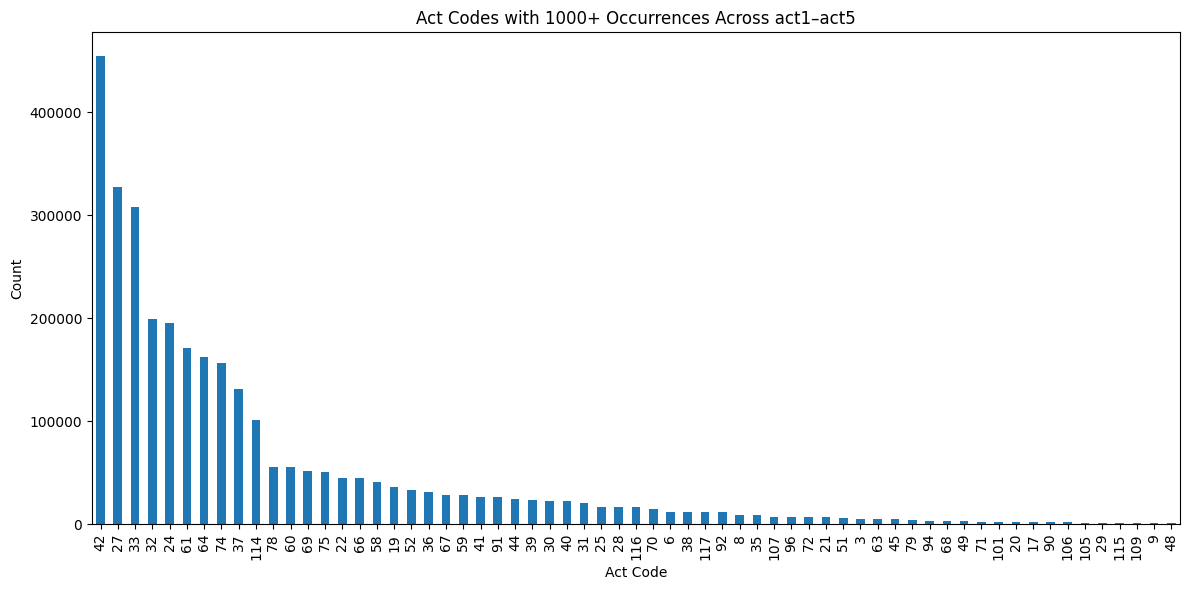

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Combine into one Series
all_acts = pd.concat([susp_master[col] for col in act_cols])

all_acts = all_acts[all_acts != "."]

# Step 3: Drop NaNs and count
act_counts = all_acts.dropna().value_counts()

# Step 4: Filter for codes with 1000+ occurrences
filtered_counts = act_counts[act_counts >= 1000].sort_values(ascending=False)

# Step 5: Plot
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title('Act Codes with 1000+ Occurrences Across act1–act5')
plt.xlabel('Act Code')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()
